# Visualize Conv Filters
## Adam Optimizer, Dropout 0.2, Batch Normalization, Data Augmentation, Xavier Initialization, Learning Rate Scheduler (Reduce Learning Rate on Plateau)

In [1]:
import torch
from model_utils import TrafficSignsConvNet
from training_utils import load_checkpoint, print_model_details
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data/gtsrb-german-traffic-sign/Train'
ckpt_path = 'models/adam_batchnorm_dataaug_xavier_lrscheduler_dropout0.2/best.pt'
num_classes = 5
use_batch_norm = True

In [3]:
# set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

# model
model = TrafficSignsConvNet(
    num_classes=num_classes,
    batch_norm=use_batch_norm
)

# transfer model to device
model = model.to(device)

# load checkpoint
print(f'loading checkpoint {ckpt_path}')
state = load_checkpoint(ckpt_path, model, device=device)

# set to eval mode
model.eval()

device: cpu
loading checkpoint models/adam_batchnorm_dataaug_xavier_lrscheduler_dropout0.2/best.pt


TrafficSignsConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (batchnorm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (batchnorm2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(12, 18, kernel_size=(5, 5), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout2d(p=0.5, inplace=False)
  (batchnorm3): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(18, 24, kernel_size=(5, 5), stride=(1, 1))
 

In [4]:
# plot
def plot_filters(conv_layer):
    weight = conv_layer.weight.data.numpy()
    height = weight.shape[0]
    width = weight.shape[1]
    fig, axs = plt.subplots(
        nrows=height,
        ncols=width,
        figsize=(10, 10),
        dpi=160
    )
    for row in range(height):
        for col in range(width):
            axs[row, col].imshow(weight[row, col])
            axs[row, col].axis('off')
            axs[row, col].set_aspect('equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

## Convolutional Layer 1

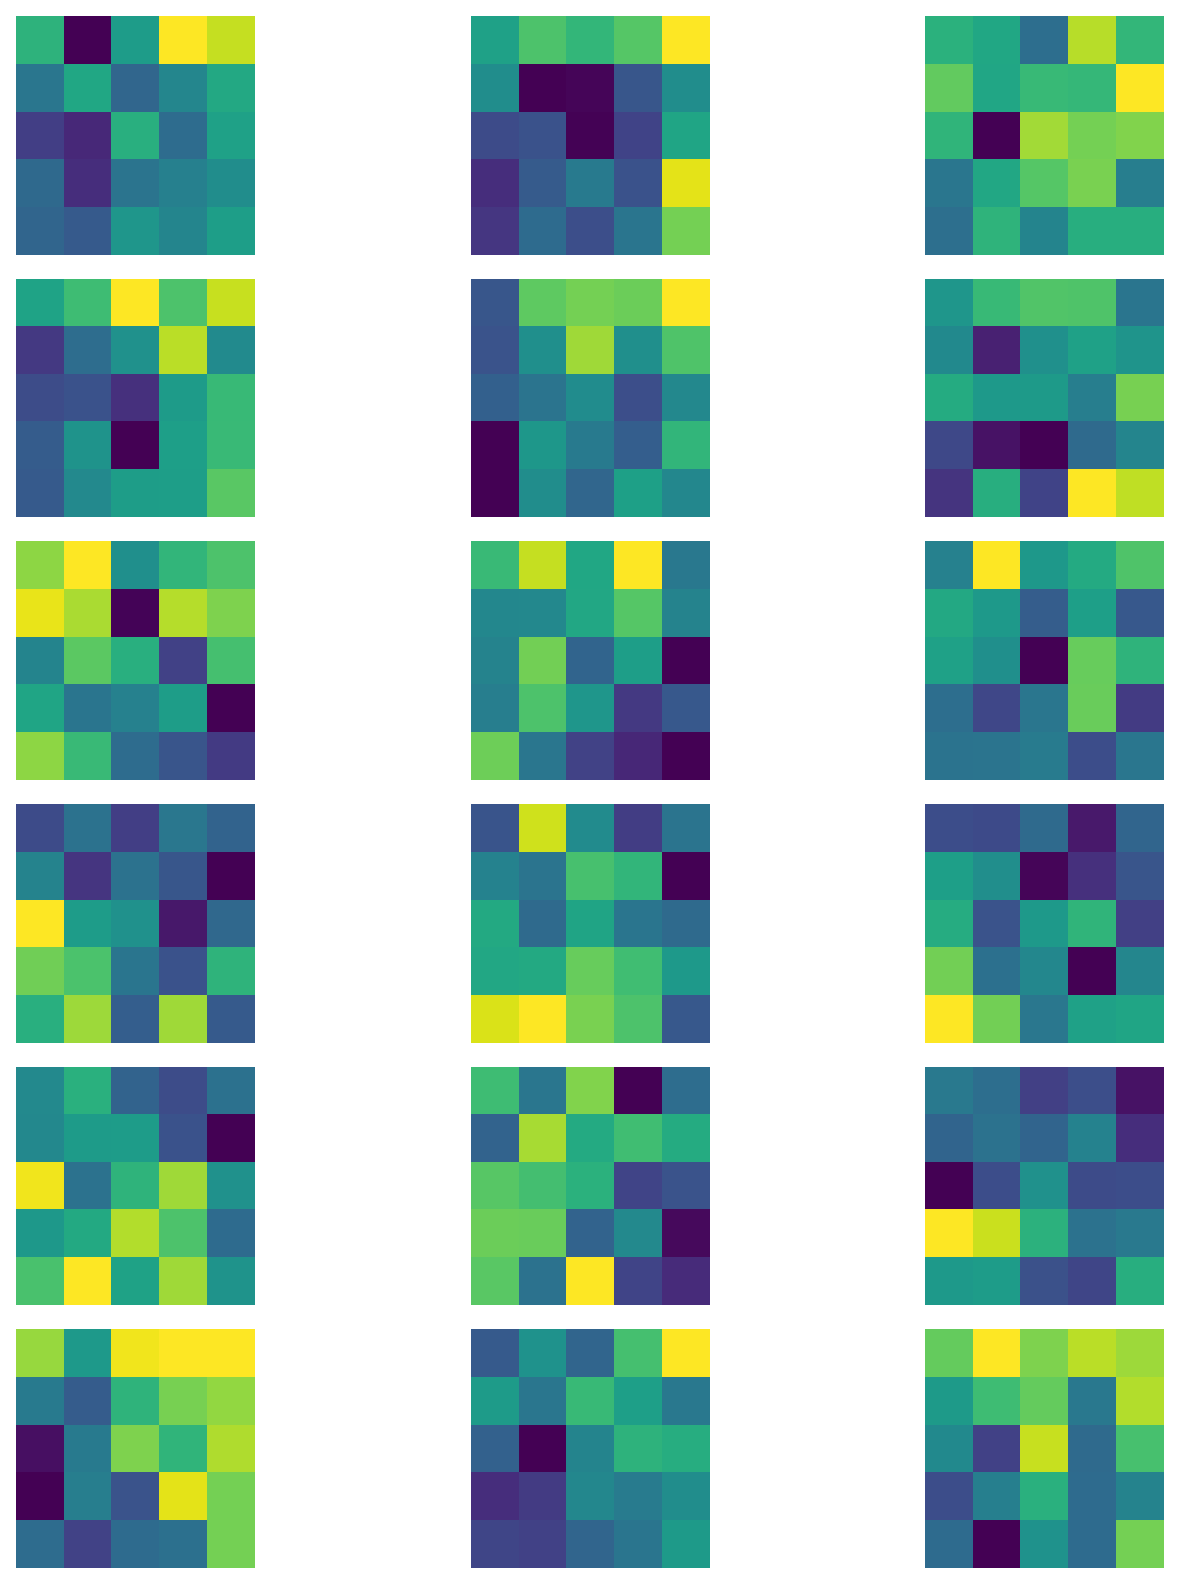

In [5]:
plot_filters(model.conv1)

## Convolutional Layer 2

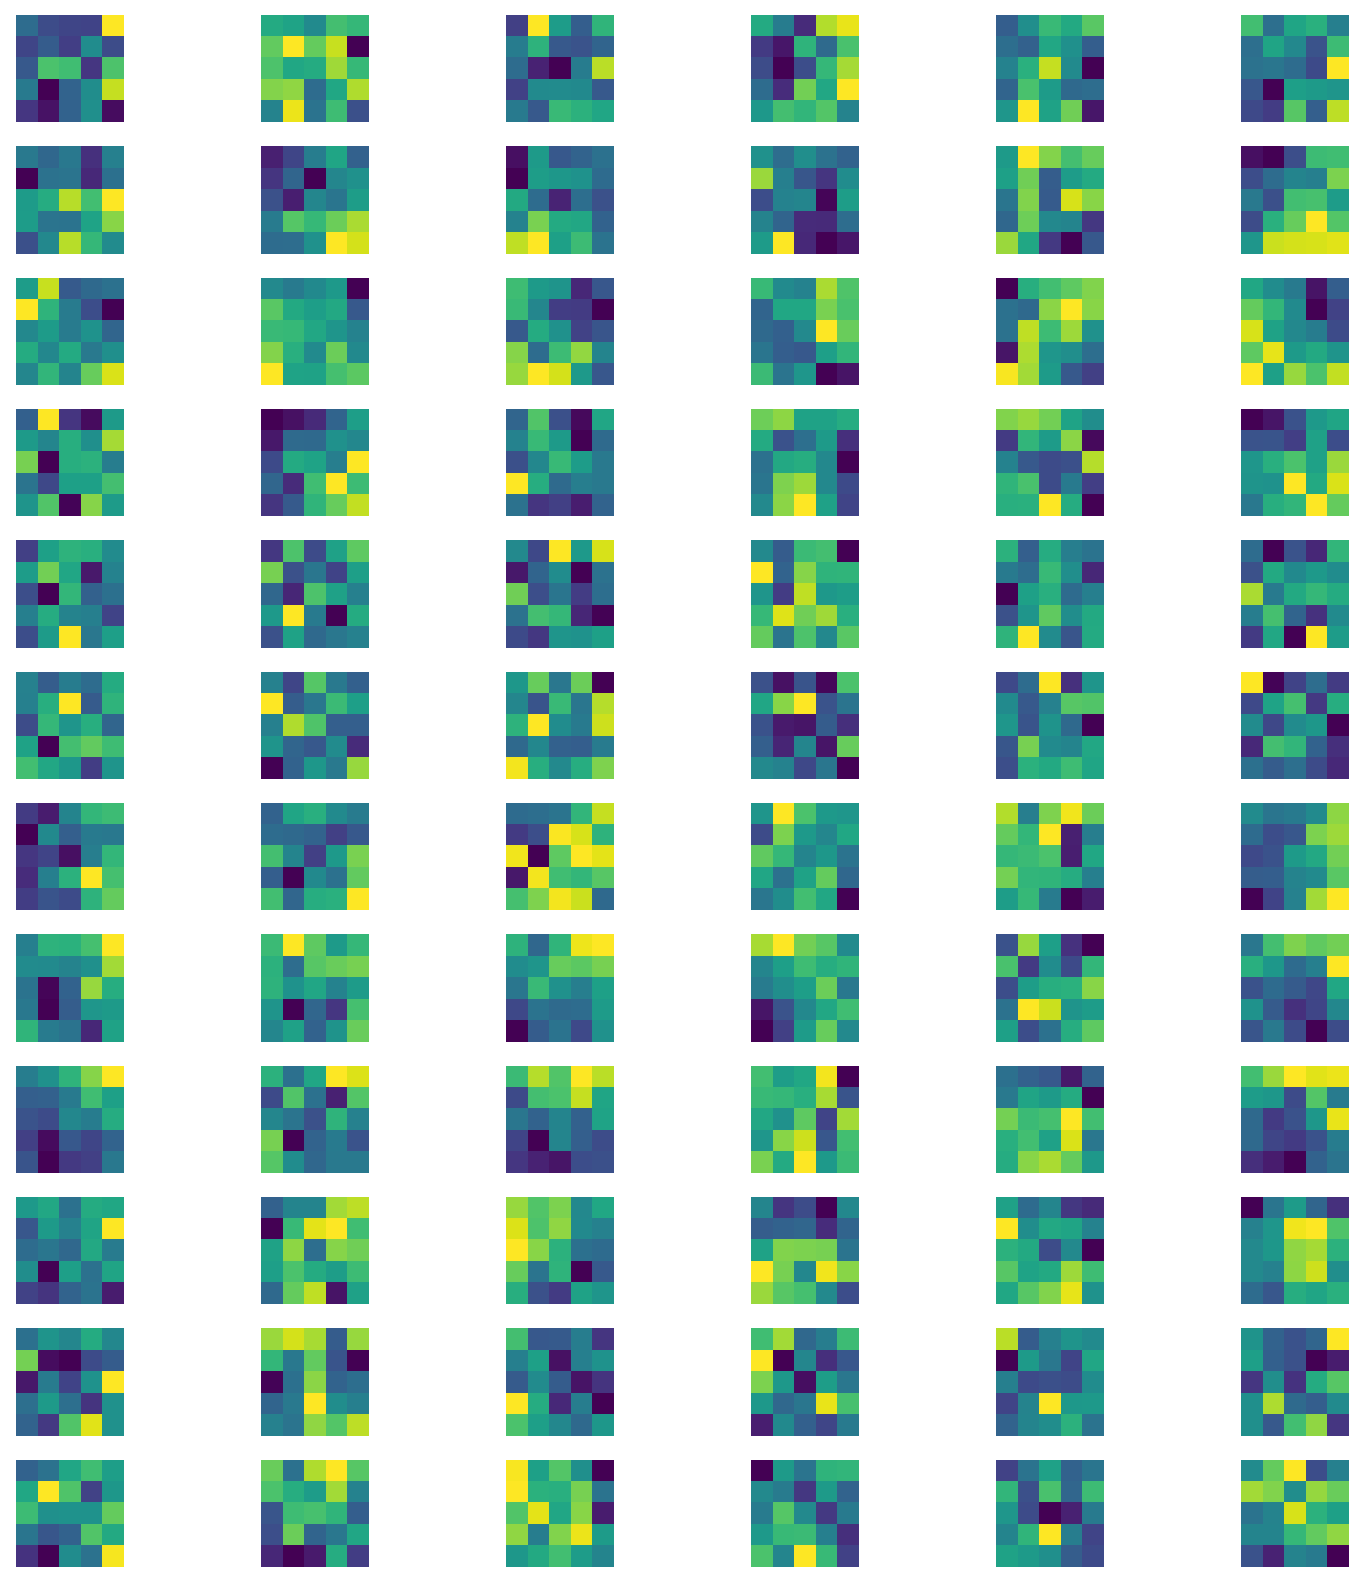

In [6]:
plot_filters(model.conv2)

## Convolutional Layer 3

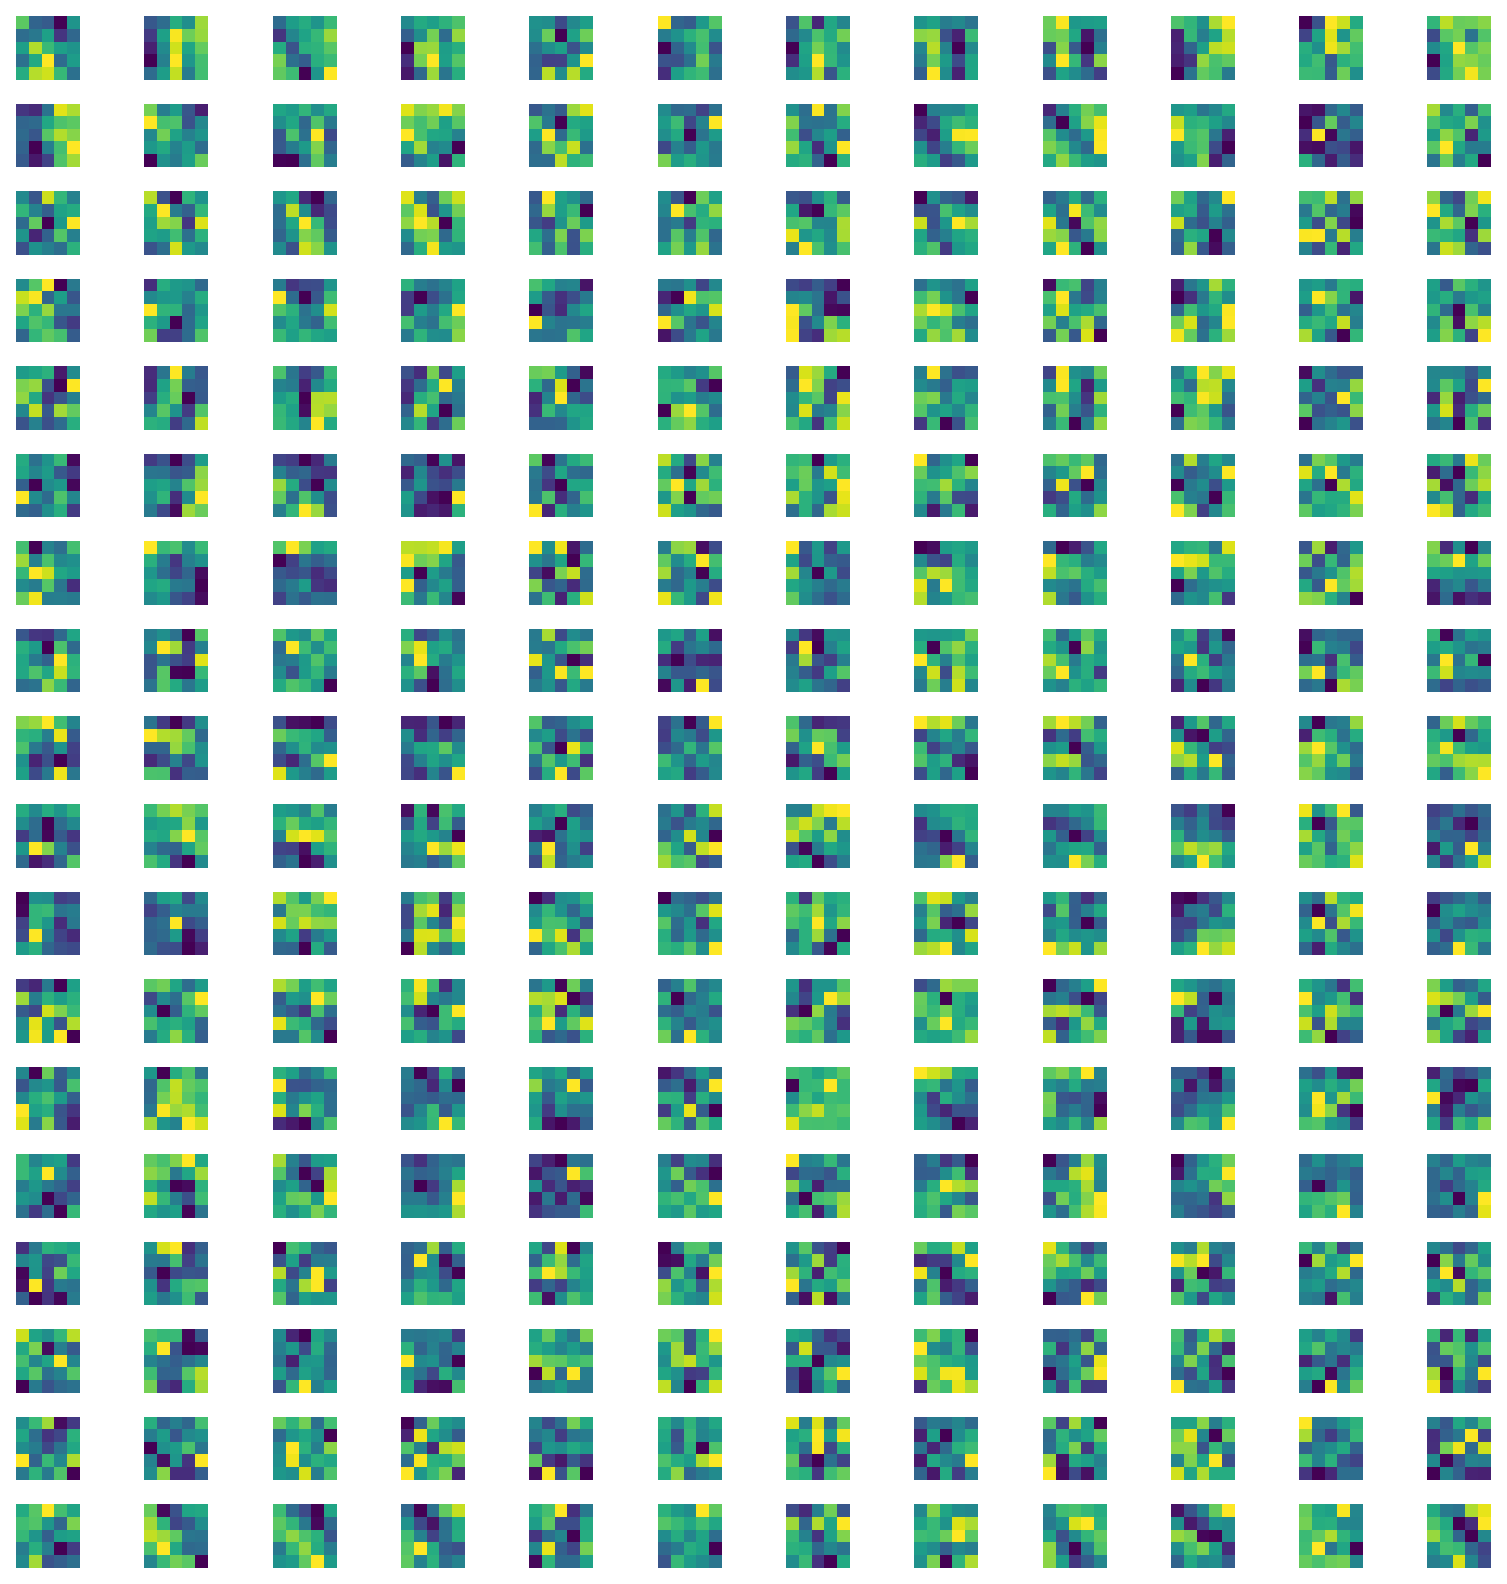

In [7]:
plot_filters(model.conv3)

## Convolutional Layer 4

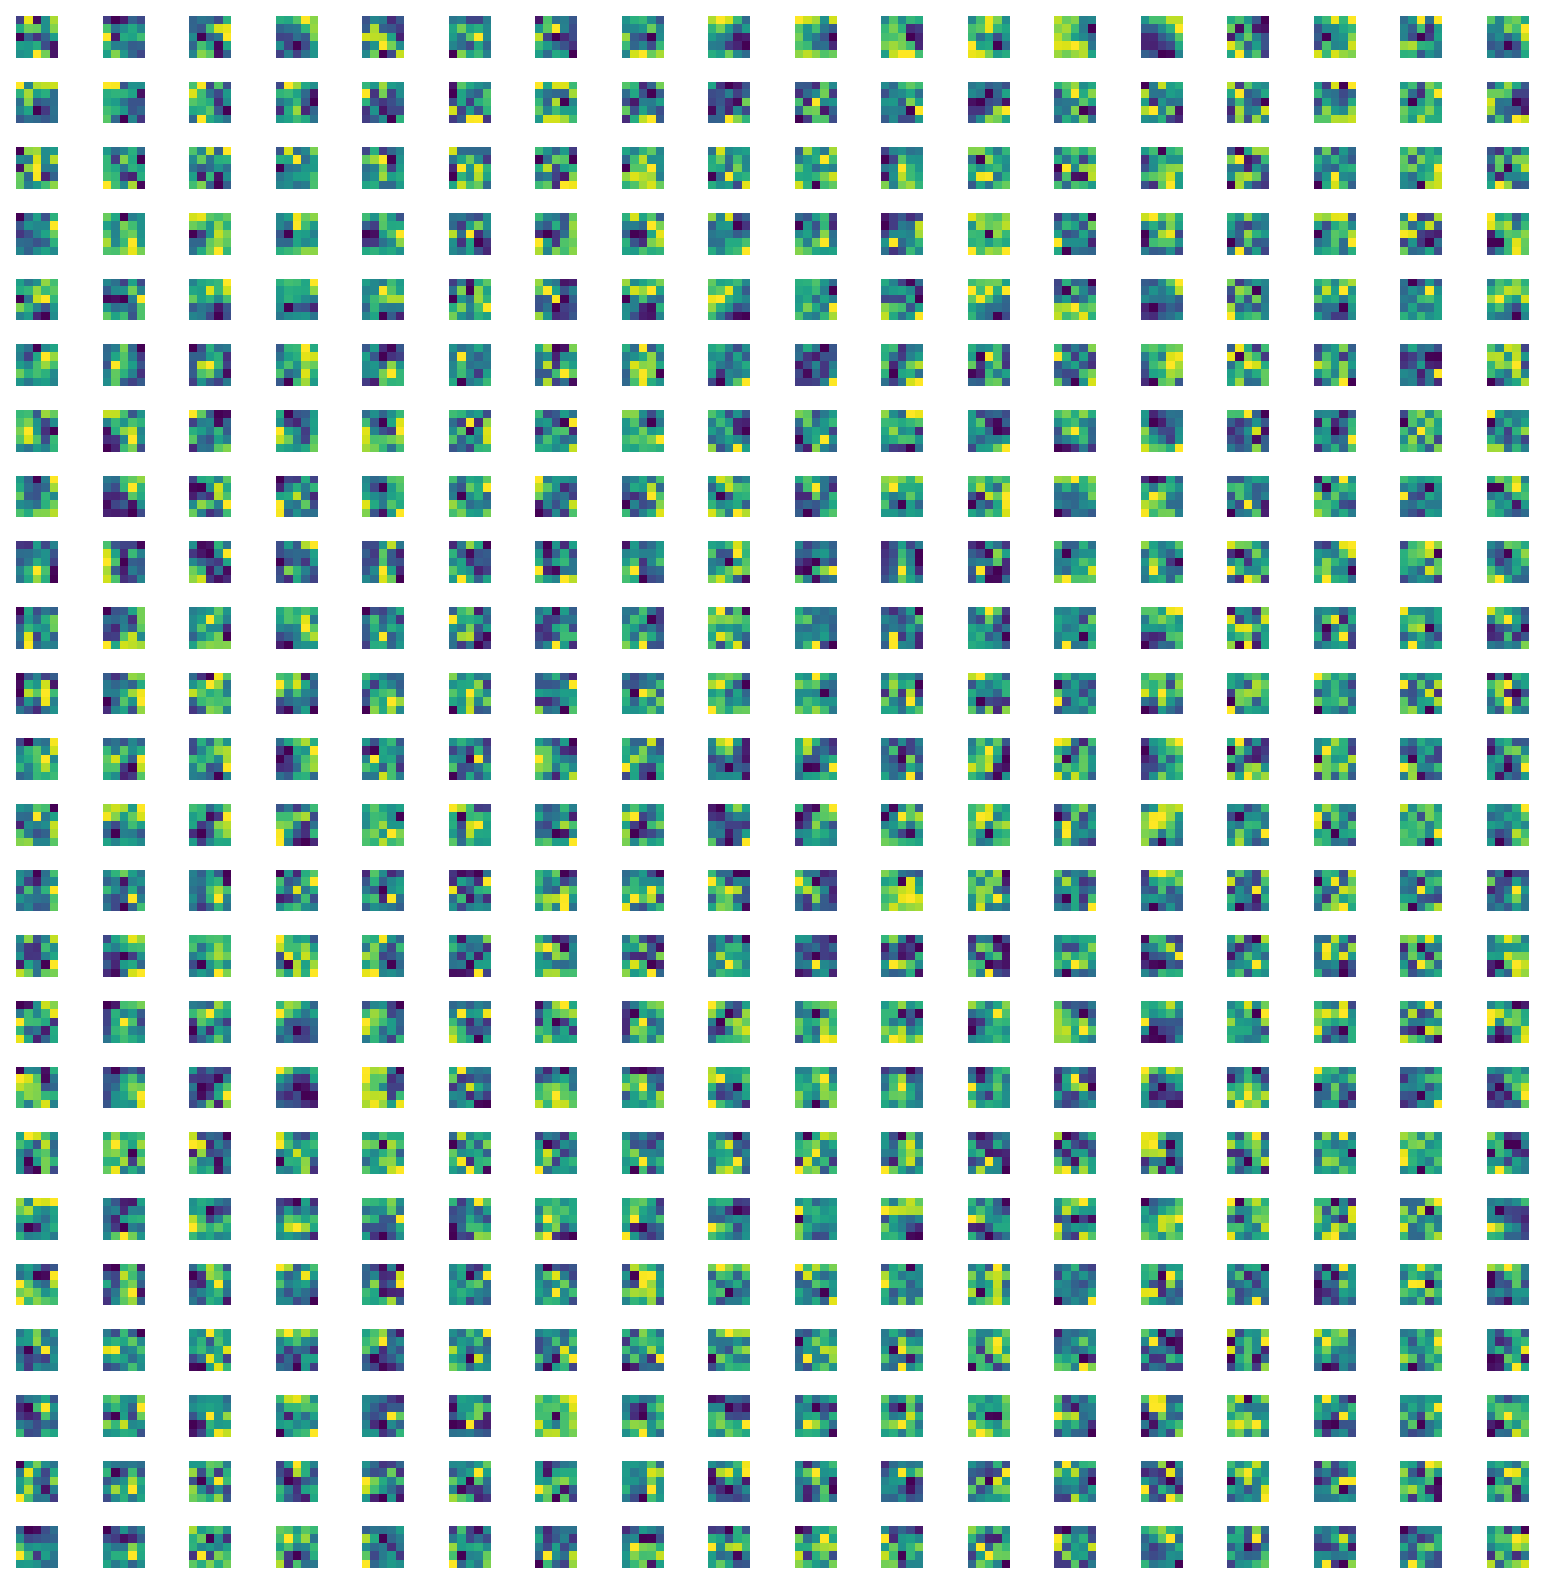

In [8]:
plot_filters(model.conv4)

